# Statistics for data science and measurement
## Babak Moghadas 1 and Brian Caffo 1, 2
### 1 Department of Biostatistics 
### 2 Department of Biomedical Engineering
### Bloomberg School of Public Health
### Johns Hopkins University

## About these slides

+ Goal is the least that you need to know
+ All slides are created in Jupyter notebooks - free to use and open source
+ [Github repo](https://github.com/smart-stats/odsc_2023)
+ [pyglide](https://pypi.org/project/pyglide/) provides the interactivity


## Part 1 Statistical Inference

## Statistical inference 

+ Statistical inference is the process of drawing conclusions that generalize beyond your data
+ Often this is characterized as generalizing to a population from a sample

### Motivating problems

+ Does a treatment work in a patient population?
+ What fraction of people will vote for a particular candidate?
+ What is the case fatality rate of SARS-CoV-2 in a particular region?
+ Does a safety intervention prevent automobile related injuries?

###  Getting some stuff out of the way

+ Probability models are the *only* theoretical founded method for formal statistical inference
+ Other strategies, like prediction performance on a new dataset, are practical, yet only become theoretically formal when combined with a probaiblity model at some level
+ All statistical inferences require *assumptions*
  + Some approaches lean into model assumptions (statistical modeling) 
  + Others try really hard to be robust to assumptions (robust inference)

### Getting some stuff out of the way

There are three main paradigms of inference

+ Frequency statistics - inferences are based on conceptual repetitions of the experiment, particuarly useful for decision making
+ Bayesian statistics - inferences are based on a calculus of belief, particularly useful for estimation, modeling and assessing beliefs 
+ Likelihood based statistics - inferences are based on a mathematical functions called the likelihood, particularly good for quantifying evidence

Paradigms differ by evaluation criteria, not methods. So typical Bayesian methods evaluted by frequency standards are frequency techniques

To summarize the three paradigms answer: "What should I do?", "What should I believe?" and "What do the data say?" [(see Royal 1997)](https://www.routledge.com/Statistical-Evidence-A-Likelihood-Paradigm/Royall/p/book/9781032478005)

We'll mostly focus on frencuency statistics, the dominant paradigm

### Concept 1: Sampling

#### Sampling

+ Sampling describes how data arrive into our dataset
+ Random sampling refers to the idea that our data are drawn at random independently from a population
+ One can try to enforce random sampling by design (some surveys try this) or it is a working assumption 
   + In the latter case, conclusions are of the form "If this were a random sample ..."

##### Example Capture / Recapture

+ $N$ = total number of animals
+ $X$ = number captured in the first visit
+ $Y$ = number captured in the second visit
+ $Z$ = number captured on both visit ($Z \leq Y$)

At the second collection, there were $X/N$ in the population marked from the first collection.

Under random sampling, $Z/Y$ should then be approximately $X/N$

Thus, $N \approx XY/Z$. Using sampling as an idea (plus other assumptions) we arrive at an estimate of the size of a population from a sample

##### Example

+ Bishop, Fienberg and Holland (1974) report on a study by Andrewartha (1961) of capture recapture of weevils in a box of wheat
+ 498 initially taken and marked 
+ 110 taken a second time, 20 marked

In [8]:
498 * 110 / 20

2739.0

##### Example
Simulation of the capture recapture experiment to estimate the population size
<div><!--Course_Code--></div>


### Concept 2: conditioning / adjustment

#### Conditioning
+ Conditioning, often referred to as "adjustment" is the act of looking at a distribution of a variable with another held constant
+ Regression, logistic regression, GLMs, GAMS, supervised learning and many other techniques can be considered variations on conditioning
+ Conditioning is a main tool to address *confounding*, instances where two variables have a common cause (confounder)
   + Deaths in the summer go up with ice cream sales (common cause, heat waves)
   + Breath mint usage linke to lung cancer (common cause, smoking)

#### Simpson's "paradox"

+ Simpson's paradox refers to the fact that the apparent relationship between two variables can reverse upon consideration (adjustment) for a third
+ It is typically shown in 2x2 tables, but it works equally well in regression

##### Example: adjustment does nothing

In [1]:
# code in the file part1_code.py
import part1_code
from part1_code import *

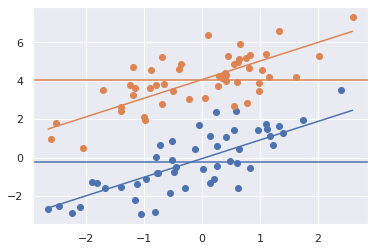

In [2]:
part1_code.myplot(x, y, t)

##### Example: adjustment attenuates effect

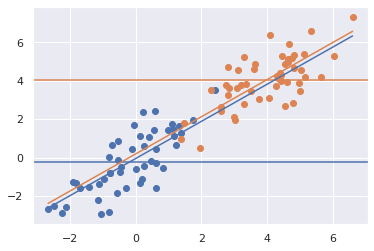

In [3]:
 part1_code.myplot(x + t * 4, y, t)

##### Example: adjustment adds effect

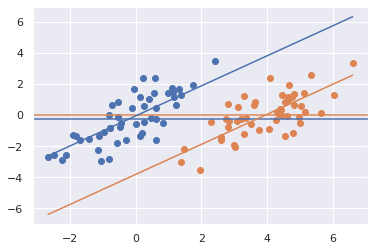

In [4]:
myplot(x + t * 4, y  - t * 4, t)

##### Example: adjustment reverses and adds effect

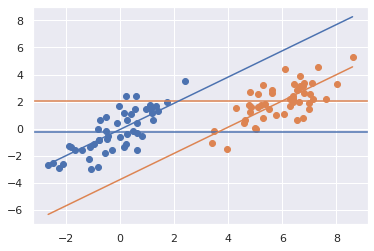

In [5]:
myplot(x + t * 6, y  - t * 2, t)

#### Relationships 

+ A **confounder** is a common cause between two variables
+ A **colider** is a consequence with two causes 
+ A **mediator** is a consequence of one variable and cause of another
+ X1 is a confounder between X2 and X3
+ X2 is a mediator between X1 and X3
+ X3 is a collider between X1 and X2

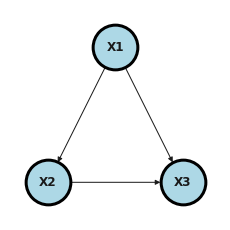

In [6]:
part1_code.causal1()

#### Rules of thumb
+ Typically one wants to adjust for confounders
+ Typically one does not want to adjust for colliders
+ Typically one adjust for mediators to remove associations with other variables

#### Berkson's paradox
+ Example of a collider
+ X = SAT score
+ Y = GPA
+ Z = matriculated
+ SAT -> matriculated <- GPA

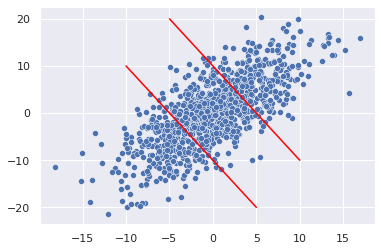

In [29]:
part1_code.berkson_plot()

#### The backdoor criteria

A set $Z$ satisfies the **back door** criterion with respect
to nodes $X$ and $Y$ if 

1. No descendant of $X$ is in $Z$.
2. $Z$ blocks every path $X$ and $Y$ that contains an arrow pointing to $X$.

A path between two nodes is **blocked** by a set of nodes, $S$, if a mediator or confounder is included in $S$ or a collider and all of its descendants is excluded from $S$


#### Example

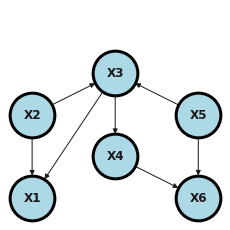

In [7]:
part1_code.causal2()

### Concept 3: randomization

#### Randomization
+ Using adjustment, we can control for measured and known confounders
  + Typically this requires an accurate model
+ We generally can't control for unmeasured known confounders
  + Sometimes the causal diagram allows for controlling for a variable by adjusting for other variables in a path
+ We definitely can't control for unkown confounders
+ Randomization is the strongest tool for adjustment for unmeasured and unkown confounders

#### Example
+ In a recent project, trans cranial direct stimulation was applied to aphasia patients versus a sham treatment
+ Why was treatment status randomized?
  + Patients that opt into treatment in an observational study may differ systematically
  + Randomization, unless we are unlucky, balances pre-treatment patient characteristics between the treatment and control groups
     + If there is something you're concerned about *block* on that variable then randomize within levels of that variable
     + Example: if we were concerned about sex, randomize 


#### The most famous randomized experiment ever


| Poured ⇩, guess  ⇨ |  Tea        | Milk    | Totals |
| -----------:  | ----------- | ------- |-------|
| Tea          |     3       |   1     | 4     |
| Milk         |     1       |   3     | 4     |
| Totals       |     4       |   4     | 8     |

In [4]:
from scipy.stats import fisher_exact
p_value = fisher_exact([[3, 1], [1, 3]])
print(p_value)

(9.0, 0.48571428571428565)


#### How does this work?
+ Randomization test

| Subject | Poured  |  Guess |
| ---  | --- | --- |
| 1 | Tea | Tea |
| 2 | Tea | Tea |
| 3 | Tea | Tea |
| 4 | Tea | Milk |
| 5 | Milk | Tea |
| 6 | Milk | Milk |
| 7 | Milk | Milk |
| 8 | Milk | Milk |



#### Discussion
+ We are re-randomizing the treatment (which is poured first); all of these tables are consistent with the hypothesis that there is no relationship
+ We calculate the fraction of instances where data is as or more extreme in favor of the hypothesis that there is a relationship (P-value)
+ Rejecting the hypothesis that there is no relationship ensures that the probability that we reject the null when it's actually true (type I error) low
  + If we don't reject it might be because the alternative is false, but absence of evidence isn't necessarily evidence of absence
  + We have controlled the probability of falsely rejecting when the null is true; we haven't controlled the probability of falsely accepting the null when then alternative is true
  + The latter probability is controlled in the study design by so-called power or sample size calcluations